In [63]:
# Importing needed libraries:
# Make this a function named acquire.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats


import os
import env

In [2]:
import acquire
import wrangle
import prep

acquire.py functions loaded successfully
wrangle.py functions loaded successfully


In [44]:
df = acquire.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,NaN,NaN,1534.0,NaN,NaN,1534.0,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,NaN,33981374.0,-118317057.0,5000.0,NaN,NaN,NaN,NaN,NaN,0300,247.0,LARD1.5,6.037235e+07,12447.0,3101.0,118208.0,96028.0,0.0,NaN,NaN,NaN,3.0,NaN,NaN,1940.0,NaN,NaN,20684.0,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1458.0,1458.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34686163.0,-118113100.0,8284.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LRR6000*,6.037901e+07,5534.0,3101.0,NaN,97318.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108890.0,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,NaN,NaN,1421.0,1421.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,33999877.0,-118291863.0,6707.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LAR1,6.037232e+07,12447.0,3101.0,118208.0,96018.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1911.0,NaN,NaN,11982.0,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,NaN,NaN,2541.0,2541.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,426.0,NaN,NaN,33694636.0,-117912245.0,4975.0,NaN,NaN,NaN,NaN,NaN,1,261.0,None,6.059064e+07,38032.0,1286.0,NaN,96958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2003.0,NaN,NaN,434887.0,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,NaN,NaN,1650.0,1650.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33985377.0,-118361620.0,7300.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LCR1YY,6.037703e+07,396550.0,3101.0,NaN,96037.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1949.0,NaN,NaN,165000.0,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [45]:
df = prep.prep_zillow_data()
df.shape

(21352, 31)

In [46]:
pd.options.display.max_columns = 100

In [47]:
df.shape

(21352, 31)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   bathroomcnt                   21352 non-null  float64
 3   bedroomcnt                    21352 non-null  float64
 4   calculatedbathnbr             21352 non-null  float64
 5   calculatedfinishedsquarefeet  21352 non-null  float64
 6   finishedsquarefeet12          21352 non-null  float64
 7   fips                          21352 non-null  float64
 8   fullbathcnt                   21352 non-null  float64
 9   heatingorsystemtypeid         21352 non-null  float64
 10  latitude                      21352 non-null  float64
 11  longitude                     21352 non-null  float64
 12  lotsizesquarefeet             21352 non-null  float64
 13  p

In [61]:
df.describe()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusetypeid,logerror
count,2.135200e+04,2.135200e+04,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,2.135200e+04,2.135200e+04,2.135200e+04,21352.000000,2.135200e+04,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,21352.000000,2.135200e+04,2.135200e+04,21352.0,2.135200e+04,21352.000000,2.135200e+04,21352.000000,21352.000000
mean,1.510704e+06,1.305021e+07,2.304632,3.061727,2.322734,1800.447152,1776.715597,6049.393125,2.252219,3.955741,3.400427e+07,-1.182018e+08,2.745509e+04,261.675909,6.049694e+07,33381.430947,2509.822827,96604.933265,1.543837,1.108271,1968.261201,1.917828e+05,5.030912e+05,2016.0,3.116318e+05,6138.545271,6.049679e+13,261.675909,0.012698
std,8.590985e+05,3.442568e+06,0.994982,1.130032,0.973808,944.553063,914.233623,21.135638,0.958671,2.834390,2.670335e+05,3.616733e+05,8.690801e+04,3.805794,2.097876e+05,46021.235762,809.259245,4169.486264,2.878904,0.370724,23.837674,2.367041e+05,6.505557e+05,0.0,4.688036e+05,7545.435503,2.093104e+11,3.805794,0.169943
min,3.490000e+02,1.071210e+07,0.000000,0.000000,1.000000,242.000000,242.000000,6037.000000,1.000000,1.000000,3.334085e+07,-1.193883e+08,4.350000e+02,246.000000,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,1.000000,1824.000000,1.290000e+02,1.050400e+04,2016.0,2.250000e+03,19.920000,6.037101e+13,246.000000,-4.453964
25%,7.747790e+05,1.156517e+07,2.000000,2.000000,2.000000,1188.750000,1194.000000,6037.000000,2.000000,2.000000,3.380747e+07,-1.184140e+08,5.994750e+03,261.000000,6.037311e+07,12447.000000,1286.000000,96193.000000,0.000000,1.000000,1953.000000,8.500675e+04,2.108100e+05,2016.0,8.780000e+04,2739.842500,6.037311e+13,261.000000,-0.026735
50%,1.526014e+06,1.254709e+07,2.000000,3.000000,2.000000,1557.000000,1572.000000,6037.000000,2.000000,3.955741,3.401928e+07,-1.181780e+08,7.600000e+03,261.000000,6.037621e+07,25218.000000,3101.000000,96395.000000,0.000000,1.000000,1969.000000,1.387925e+05,3.652830e+05,2016.0,2.091910e+05,4523.675000,6.037621e+13,261.000000,0.004370
75%,2.251791e+06,1.424740e+07,3.000000,4.000000,3.000000,2137.000000,2063.000000,6059.000000,3.000000,3.955741,3.417543e+07,-1.179231e+08,2.028750e+04,265.000000,6.059052e+07,45398.000000,3101.000000,96987.000000,0.000000,1.108271,1987.000000,2.218638e+05,5.885595e+05,2016.0,3.812392e+05,7139.585000,6.059042e+13,265.000000,0.036181
max,2.982274e+06,1.676878e+08,11.000000,12.000000,11.000000,15450.000000,15450.000000,6111.000000,11.000000,24.000000,3.477966e+07,-1.175554e+08,3.589145e+06,275.000000,6.111009e+07,396556.000000,3101.000000,399675.000000,14.000000,4.000000,2015.000000,7.893568e+06,2.385837e+07,2016.0,1.635060e+07,276797.830000,6.111009e+13,275.000000,3.175688


In [ ]:
# Looking for outliers in the data, so going to use a boxplot:

sns.boxplot(data = df, x = )

In [8]:
df_cleaned = df.drop(columns={'transactiondate', 'propertycountylandusecode'})

In [9]:
df_cleaned.shape

(21352, 29)

In [51]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [52]:
X_train.shape

(11956, 28)

In [53]:
# numeric_cols = wrangle.get_numeric_X_cols(X_train, wrangle.get_object_cols(df))
# len(numeric_cols)

In [54]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [55]:
X_train_scaled.shape

(11956, 28)

In [56]:
X_train_scaled.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusetypeid,logerror
3927,0.599719,0.025732,0.272727,0.166667,0.20,0.182322,0.182322,0.297297,0.1,0.128510,0.084331,0.905312,0.007529,0.689655,0.296872,0.053686,0.0,0.003309,0.0,0.03609,0.825503,0.040794,0.0,0.028981,0.030864,0.296872,0.689655,0.633541
19745,0.627826,0.011624,0.090909,0.166667,0.00,0.043299,0.043299,0.000000,0.0,0.260870,0.266832,0.683229,0.000673,0.517241,0.006444,0.106826,1.0,0.000840,0.0,0.00000,0.563758,0.013765,0.0,0.026478,0.023358,0.006444,0.517241,0.636842
1732,0.059076,0.023485,0.227273,0.250000,0.15,0.103328,0.103328,0.297297,0.1,0.128510,0.096756,0.926589,0.000882,0.517241,0.296872,0.053686,0.0,0.003309,0.0,0.03609,0.825503,0.016087,0.0,0.029037,0.021715,0.296872,0.517241,0.631335
17739,0.045942,0.003047,0.272727,0.250000,0.20,0.125783,0.125783,0.000000,0.2,0.043478,0.863848,0.660879,0.002014,0.517241,0.010947,0.091345,1.0,0.004435,0.0,0.00000,0.845638,0.015576,0.0,0.001744,0.010207,0.010947,0.517241,0.622549
15673,0.137188,0.009659,0.090909,0.250000,0.00,0.063697,0.063697,0.000000,0.0,0.260870,0.395467,0.622926,0.001356,0.517241,0.001906,0.020505,1.0,0.000003,0.0,0.00000,0.523490,0.002053,0.0,0.000747,0.002091,0.001906,0.517241,0.623408


# MVP

In [18]:
mvp_df = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
mvp_df.shape

(21352, 4)

In [60]:
mvp_df.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
count,21352.000000,21352.000000,21352.000000,2.135200e+04
mean,2.304632,3.061727,1800.447152,5.030912e+05
std,0.994982,1.130032,944.553063,6.505557e+05
min,0.000000,0.000000,242.000000,1.050400e+04
25%,2.000000,2.000000,1188.750000,2.108100e+05
50%,2.000000,3.000000,1557.000000,3.652830e+05
75%,3.000000,4.000000,2137.000000,5.885595e+05
max,11.000000,12.000000,15450.000000,2.385837e+07


In [ ]:
# Need to get rid of the outliers. 

In [95]:
stats.iqr(mvp_df.calculatedfinishedsquarefeet)

948.25

In [66]:
mvp_df2 = mvp_df[(np.abs(stats.zscore(mvp_df)) < 3).all(axis=1)]

In [67]:
mvp_df2.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
count,20677.000000,20677.000000,20677.000000,2.067700e+04
mean,2.219326,2.992649,1706.080450,4.378657e+05
std,0.846406,1.024296,738.277489,3.480640e+05
min,0.000000,0.000000,242.000000,1.050400e+04
25%,2.000000,2.000000,1176.000000,2.060000e+05
50%,2.000000,3.000000,1532.000000,3.555480e+05
75%,3.000000,4.000000,2063.000000,5.627720e+05
max,5.000000,6.000000,4633.000000,2.448071e+06


In [73]:
np.abs(stats.zscore(mvp_df)) < 3

2.407265498883012e-16

In [75]:
mvp_df[(np.abs(stats.zscore(mvp_df)) > 3).all(axis=1)].shape

(10, 4)

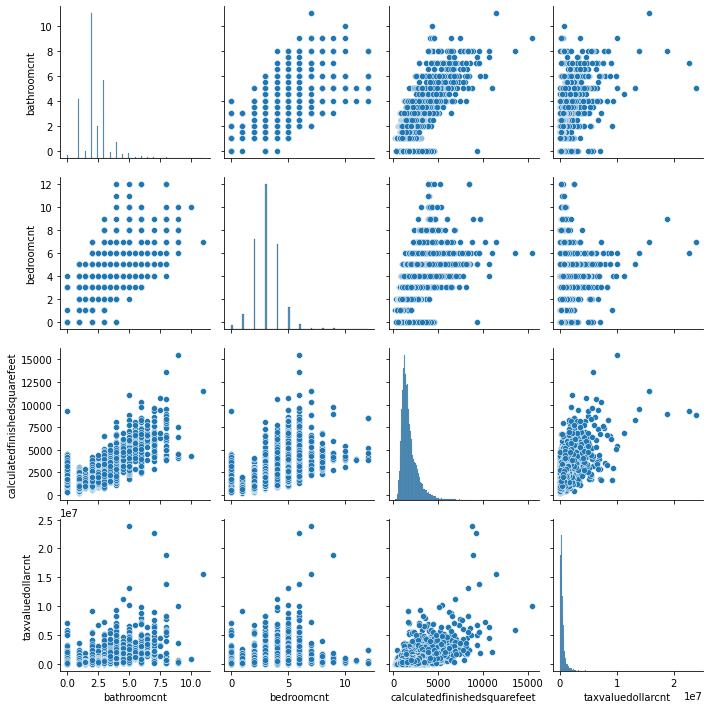

In [77]:
sns.pairplot(data = mvp_df)

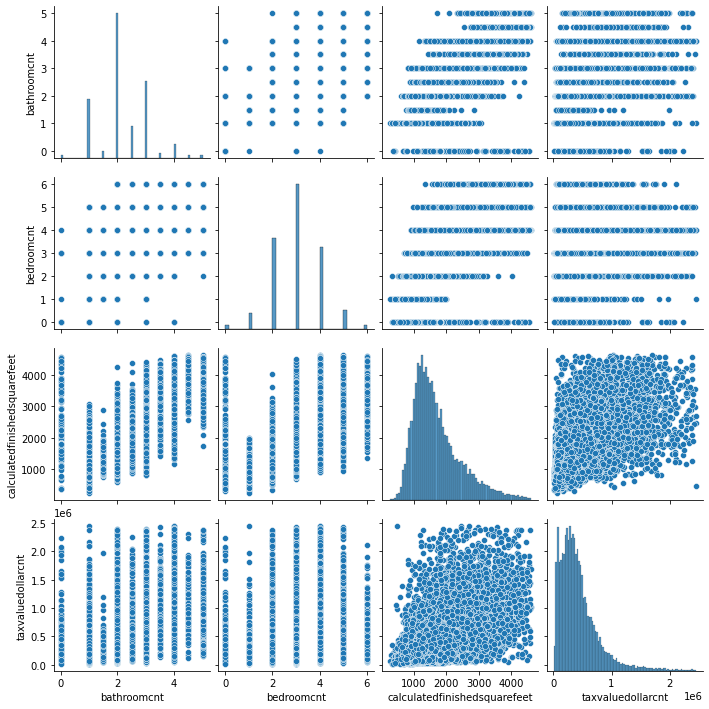

In [76]:
# After the rough cleaning
sns.pairplot(data = mvp_df2)

Now we are ready to scale the data.

In [20]:
# Importing the wrangle function:
import luke_wrangle

wrangle.py functions loaded successfully.


In [78]:
X_train_mvp, y_train_mvp, X_validate_mvp, y_validate_mvp, X_test_mvp, y_test_mvp = luke_wrangle.train_validate_test(mvp_df2, 'taxvaluedollarcnt')

In [79]:
X_train_mvp.shape

(11578, 3)

In [80]:
ob_cols = luke_wrangle.get_object_cols(X_train_mvp)
ob_cols

[]

In [81]:
num_cols = luke_wrangle.get_numeric_X_cols(X_train_mvp, ob_cols)
num_cols

['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']

In [90]:
X_train_scaled_mvp, X_validate_scaled_mvp, X_test_scaled_mvp = luke_wrangle.min_max_scale(X_train_mvp, X_validate_mvp, X_test_mvp)

In [91]:
X_train_scaled_mvp.shape

(11578, 3)

In [34]:
# Now I have my scaled, split data to begin exploring with. Remember, I only care about the train, scaled data from here on out until I do my model testing.

# Exploring

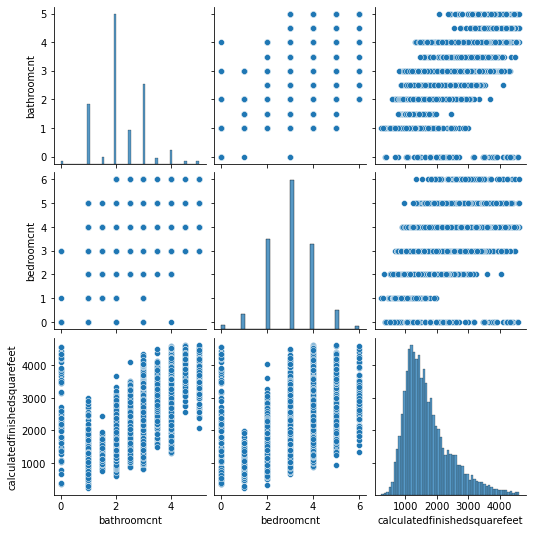

In [92]:
# Want to see how each of the features in the X_train data work in concert together.
# Using pairplot is a good way tyo 

sns.pairplot(data = X_train_mvp)

<AxesSubplot:ylabel='taxvaluedollarcnt'>

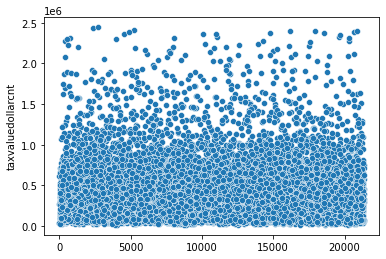

In [93]:
sns.scatterplot(data = y_train_mvp)